# Bike sharing system

UCL machine learning repository dataset. 

Let's find out how the weather and the season can affect bike rental. 

________________________________________________________________________________

### FEATURES:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from 
http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Missing.
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
 
This dataset could have info about the duration of travel, departure and arrival position. These features could turn bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.

## 1) Checking the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)


pd.options.display.max_rows = 25
pd.options.display.max_colwidth = 500

In [2]:
df= pd.read_csv("day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Let's rename count for "total" 
df.rename(columns={'cnt':'total'}, inplace=True)

In [4]:
#It shows that people rent more bikes during the summer and spring. 
b = df.groupby(['season'])['total'].sum()

b

season
1     471348
2     918589
3    1061129
4     841613
Name: total, dtype: int64

In [5]:
#Just rechecking that season 3 is summer

df_season2 = df.groupby(['season'])['temp'].mean()

df_season2

season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64

In [6]:
#Let's check that casual + registered = total 

df['compare'] = df['casual'] + df['registered'] - df['total']

df['compare'].isnull().sum()

0

In [7]:
#Only the dteday is an object, there are non NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
total         731 non-null int64
compare       731 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


**We can see in the histograms that the counts shift to the right approaching summer time.**

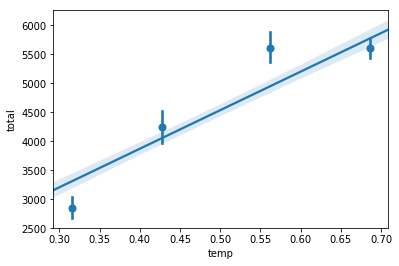

In [8]:
#Using bins to give us a quick read on continuous data

sns.regplot(data=df, x='temp', y='total', x_bins=4)

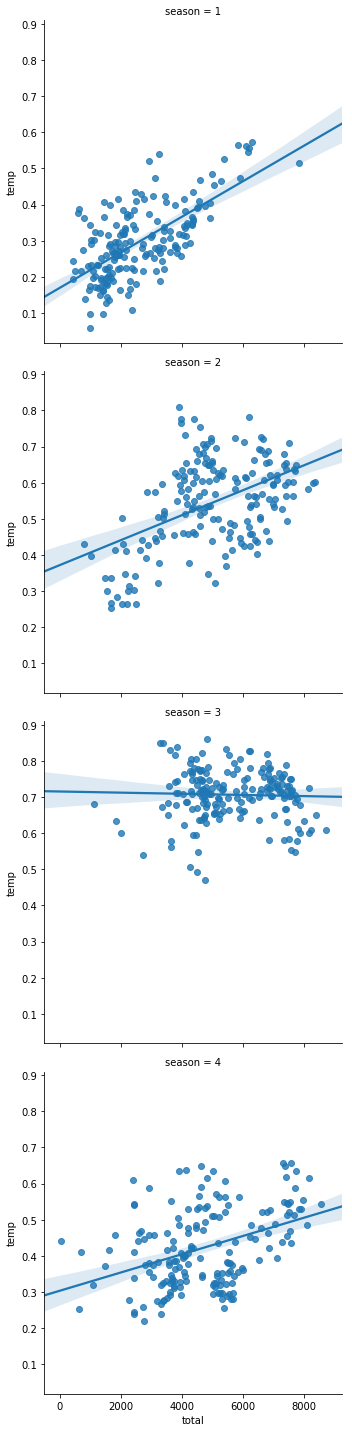

In [9]:
# Create a regression plot with multiple rows to see the trends per season
sns.lmplot(data=df,
           x="total",
           y="temp",
           row="season", palette=None, col_wrap=None, 
            aspect=1, markers='o', sharex=True, 
           sharey=True, hue_order=None, col_order=None, 
           row_order=None, legend=True)

# Show the plot
plt.show()

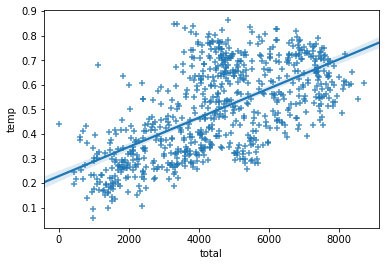

In [10]:
sns.regplot(data=df, x='total'
, y='temp'
, marker='+')

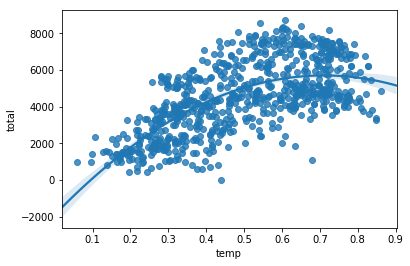

In [11]:
#Trying polinomial of order 2
sns.regplot(data=df, x='temp', y='total', order=2)

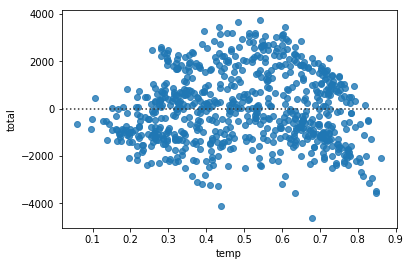

In [12]:
#Residual plot to evaluate if a linear model is reasonable
sns.residplot(data=df, x='temp', y='total')

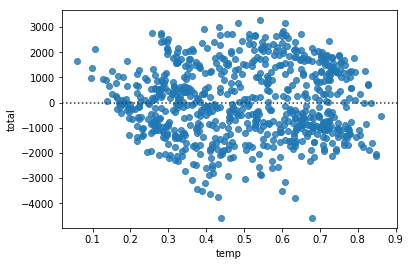

In [13]:
#Residual plot to evaluate if a second order equation is reasonable

sns.residplot(data=df, x='temp', y='total', order =2)

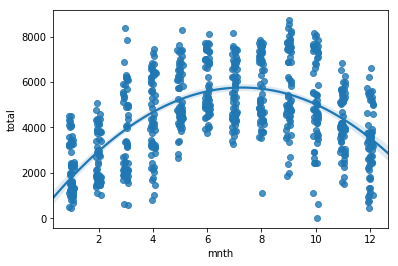

In [14]:
#ploting categorial variables
sns.regplot(data=df, x='mnth', y='total', x_jitter=.1, order=2)

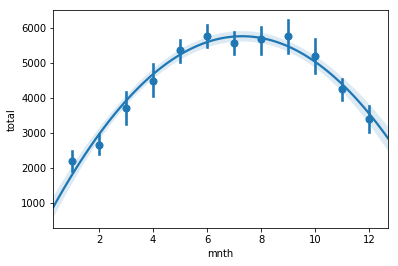

In [15]:
#ploting categorial variables
#Using an estimator to highlight trends, e.g. the mean

sns.regplot(data=df, x='mnth', y='total',
            x_estimator=np.mean, order=2)

## Seasonality plays a role in the data

From the results we can see that people rent more bikes when the weather is warm. This does not apply in the summer, when the slope of the curve is negative and the null hypothesis is true (temperature does not influence renting), giving a p-value of 0.65 (*stat evaluation below*).

New seasonal dataframes must be created.

#### Second order polinomial 
Polinomial of order two has a more random residual distribution, therefore a second order ecuation is slighlty more appropiate.

 ## 2) Relations between variables
 
Correlation matrixes help us identify relevant relations between variables, besides our target variable. In this way we could determine which variables to drop. 

Our target variable is 'total', the amount of bikes rented, with the types 'casual' and 'registered'. 

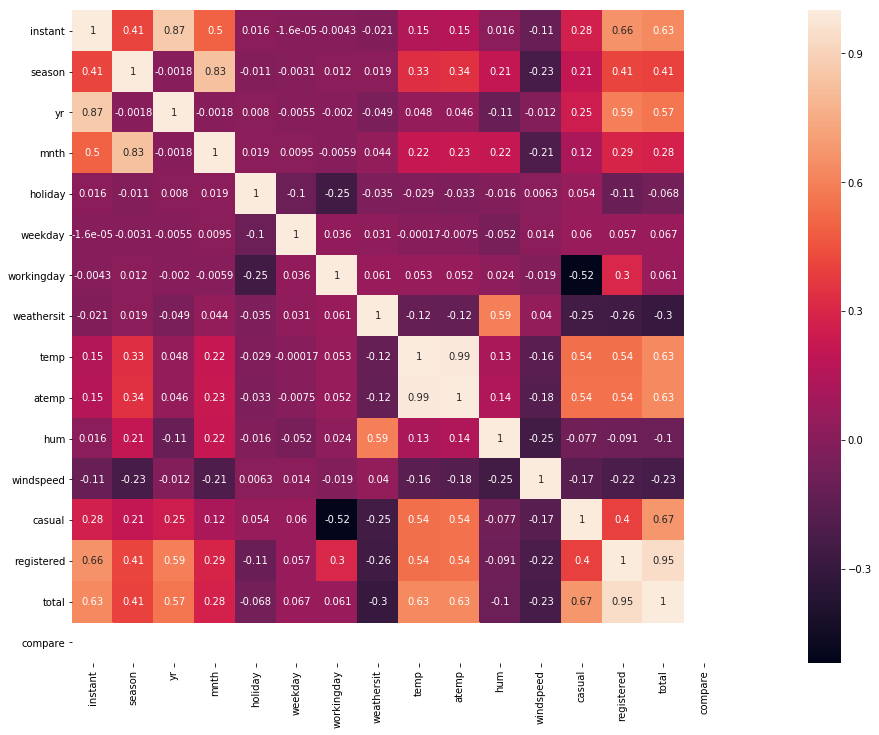

In [23]:
#df correlation matrix 

cor_mat = df[:].corr()
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True);

- The variables more correlated with 'total' are: 'season', 'month', 'weathersit', 'windspeed'. 

- It is notorious the negative correlation between 'workingday' and 'casual' registration (-0.52), and the positive correlation between 'workingday' and 'registered' (0.33). Therefore this variable should be kept for the prediction model.

Further exploration between 'wispeed' and 'hum' vs. 'weathersit' shows they are negatively correlated.

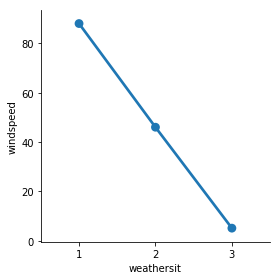

In [17]:
g=sns.factorplot(x='weathersit',y='windspeed', data=df,
                 estimator=sum,
                 ci=None,aspect=1)

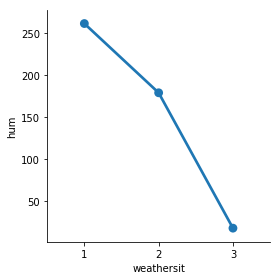

In [18]:
g=sns.factorplot(x='weathersit',y='hum', data=df,
                 estimator=sum,
                 ci=None,aspect=1)

### Year influence

It is shown that all values increase the next year. It is worth noting that winter, the lowest season of 2012, has comparable values to autumn 2011. 

**In the following we will only use the data from 2012**, to avoid mixing the relevance of the total counts.

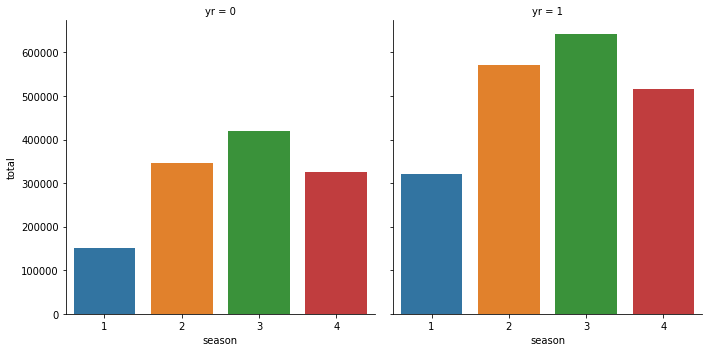

In [19]:
#Total count per year
g=sns.factorplot(x='season',y='total',data=df,
                 col='yr',kind='bar',estimator=sum,
                 ci=None,size=5,aspect=1)

In [21]:
# Dataset from year 2012
df.yr.unique()

df2012 = df[df['yr'] == 1]

df2012.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,compare
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294,0
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951,0
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236,0
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368,0
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272,0


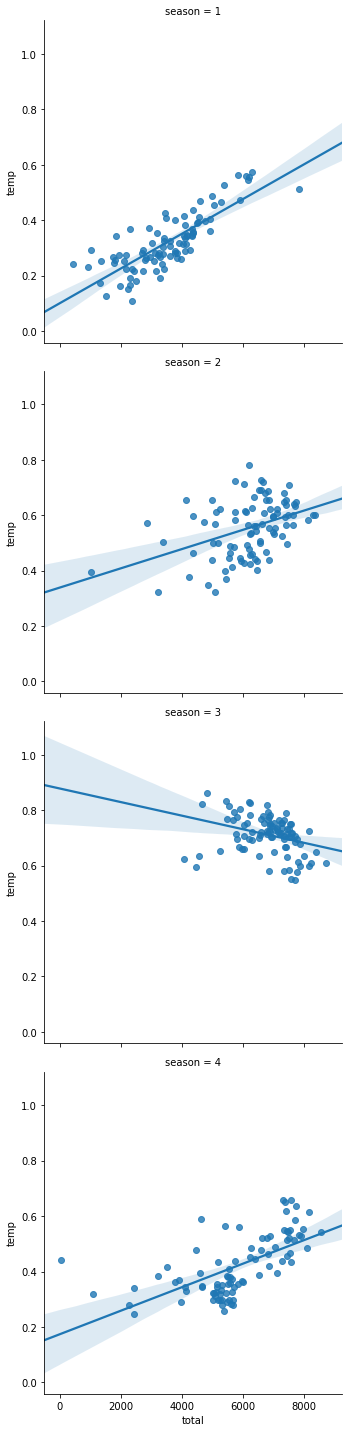

In [22]:
sns.lmplot(data=df2012,
           x="total",
           y="temp",
           row="season", palette=None, col_wrap=None, 
            aspect=1, markers='o', sharex=True, 
           sharey=True, hue_order=None, col_order=None, 
           row_order=None, legend=True)

# Show the plot
plt.show()

In [ ]:
cor_mat = df2012[:].corr()
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True);


#### Additional analysis

-  During working days and sunny days there are more bike rented, for all values. 

- There are almost no bikes rented on a bad weather day, for all values. 

- Summer is the only season when a cloudy day influences less bike rental.

- The total bike rental increased for all values during the second year.

In [ ]:
#Weather analysis together with workingday

g=sns.factorplot(x='weathersit',y='total',data=df,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=5,aspect=1)

## 3) Feature engineering 

For the sake of simplicity, we drop variables whose information is already contained in another variable, or are highly correlated. In this way we prevent our model to overfit.

- 'instant' because it is an identity variable.
- 'atemp' because it is highly correlated (0.99) with temp.
- 'weekday' and 'holiday' are already contained in 'workingday'.
- 'casual' and 'registered' are already contained in 'total'.

Remarks: 
- 'season' has general information about the temperature and the date. We can work with seasonal dataframes, dropping 'month', 'dteday'.
- We only have two dates (2011-2012), therefore there is not enough statistical data to make time series.

In [ ]:
df2012.columns.values

In [26]:
# drop example: df.drop(['B', 'C'], axis=1)

data = df2012.drop(['instant', 'dteday', 'mnth', 'holiday', 
                'weekday','atemp', 
                    'casual', 'registered', 'compare', 'yr'], axis=1)

* Correlation matrix


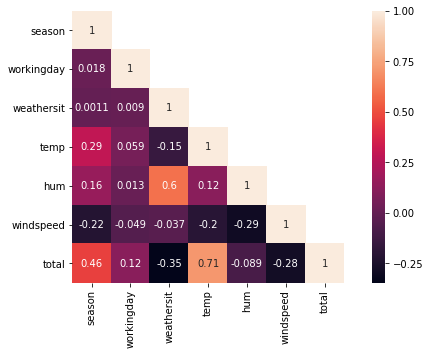

In [45]:
#correlation matrix 
cor_mat = data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

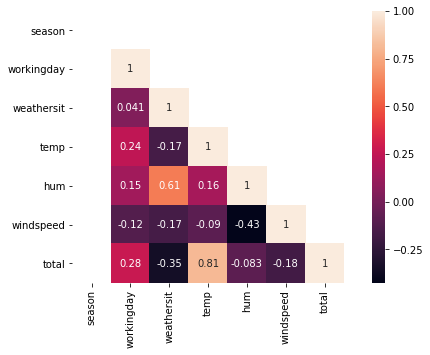

In [46]:
#Winter correlation matrix 
cor_mat = season1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

**Winter is such a drastic weather** that we assumed it is too cold to bike, therefore we can drop the highly correlated 'temp' variable, also the almost null correlated 'hum'. 

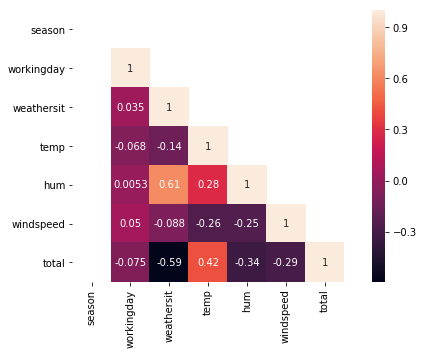

In [47]:
#spring 
cor_mat = season2[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

** During spring ** people investigate the irregular weather before renting a bike, but it is irrelevant if it is a working day or not.

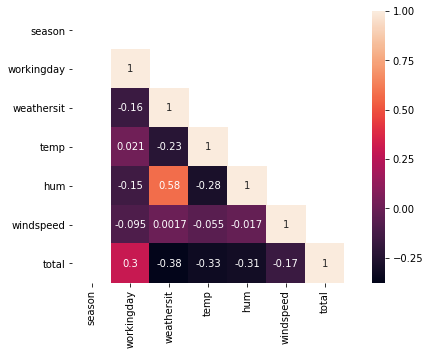

In [48]:
#summer 

cor_mat = season3[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

 ** *All variables* are relevant during the summer**, but it feels nicer to go to work by bike when the sun is shinning.

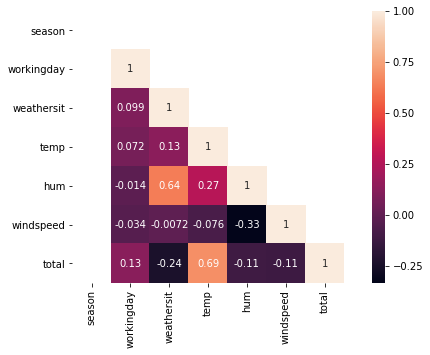

In [50]:
#autumn

cor_mat = season4[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

**When the autumn arrives** people just check the temperature to decide if they will rent a bike or not.

## 4) Seasonality correlations

- Workingday = summer (+ 0.3), winter (+0.28), spring (+0.13), autumn (-0.08).
- Weathersit= spring (-0.59), winter(-0.35), summer (-0.38), autumn (-0.24).
- Temperature = winter (+0.81), autumn (0.69), spring (0.42) summer (-0.33).
- Humidity = spring (-0.34), summer (-0.31), autumn (-0.11), winter (-0.08).
- Windspeed = spring (-0.29), winter (- 0.18), summer (-0.17), autumn (-0.11).

### Report
- Temperature is the most important feature, being very highly correlated during winter (+0.81) and only negatively correlated during summer (-0.33).
- Weathersit, humidity and windspeed are negatively correlated for all seasons.
- Weathersit is the second most important feature, being more relevant during spring (-0.59).
- Workingday is more relevant during summer and winter, but almost non correlated during autumn.
- Humidity and windspeed are more relevant during spring.

### Outliers

"Better data beats better modelling". Boxplots can evidence  outliers. 

In [ ]:
data.describe()

In any case the variance is bigger than the mean. 

In [27]:
#Filtering outliers 
# Std are very high, this outlier does not do much

ndata = data[np.abs(data["total"]-data["total"].mean())
             <=(3*data["total"].std())] 

ndata.shape

(365, 7)

In [ ]:
#exploring outliers again

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 20)


sns.lvplot(data=data, y="total", x="temp", hue= 'season', orient="v", ax=axes[0][0])
sns.lvplot(data=data, y="total", x="hum", hue= 'season', orient="v", ax=axes[0][1])
sns.boxplot(data=data, y="total", x="weathersit", hue= 'season', orient="v", ax=axes[1][1])

sns.lmplot(data=data, y="total", x="windspeed", fit_reg= True, hue= 'season', 
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) 

The graphs show how autumn is the season with more weather irregularities. The variables 'windspeed' and 'hum' have a lot of variance. We will drop these two variables that were already proven (in previous graphs) to be correlated to 'weathersit'.

#### Hypothesis testing:

A model using'weathersit' is be more realistic, but a model that drops it to give more importance to 'temp' with be simpler and with a better fitting result. 

'temp' is the most correlated variable to the target audience 'total'.

In [ ]:
#ndata = ndata.drop(['hum', 'windspeed'], axis=1)

ndata.columns

In [53]:
#Creating seasonal datasets 
#winter, spring, summer and autumn
season1 = ndata[ndata['season']== 1]
season2 = ndata[ndata['season']== 2]
season3 = ndata[ndata['season']== 3]
season4 = ndata[ndata['season']== 4]

## 4) Modelling and RMSE evaluation metrics

**Train/test split** (and further cross-validation) attempt to directly estimate how well the model will generalize to out-of-sample data.  I would like to have a function that stratifies the sampling, not that randomly selects it, but this function does not exist in python but R. We could export the dataset and process it in R.
 
**Evaluation metrics**: We are going to use the RMSE to evaluate the performance of our models, which is interpretable in the y units.

In [62]:
#x variables
x1 = season1.drop(['season', 'total', 'temp', 'hum'], axis=1)
x2 = season2.drop(['season', 'total', 'workingday'], axis=1)
x3 = season3.drop(['season', 'total'], axis=1)
x4 = season4.drop(['season', 'total'], axis=1)

In [58]:
#y variables

y1 = season1.total 
y2 = season2.total
y3 = season3.total
y4 = season4.total

In [59]:
#import
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

linreg = LinearRegression()

### Winter

In [92]:
# define a function that accepts a list of features and returns testing RMS

feature = ['workingday', 'weathersit', 'windspeed']

def train_test_rmse(feature):
    X = x1[feature]
    y = y1 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In the following we will compare different sets of features to calculate RMSEs. The results will become meaningful if we have further data that serves for evaluation. 

In [93]:
# compare different sets of features
print(train_test_rmse(feature))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

1575.2538476782433
intercept 5011.9384
[ 1201.84568436 -1272.91780362 -2762.94283328]


In [94]:
# compare different sets of features
print(train_test_rmse(['workingday', 'weathersit']))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

1609.917917030449
intercept 4230.9954
[ 1239.62711864 -1177.74653313]


#### Meaning of the coefficients
During winter, if we holding all other features fixed, one unit increase in ... 

- ... workingday is associated with a rental increase of ~ 1200 bikes.
- ... weathersit decreases bike rental of ~ 1240 bikes.
- ... windspeed decreases bike rental of 2762 bikes.

These are not statements of causation. This analysis can be done for every season.

## Spring

In [95]:
feature = ['weathersit', 'windspeed', 'temp', 'hum', 'windspeed']

def train_test_rmse(feature):
    X = x2[feature]
    y = y2 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [96]:
# compare different sets of features
print(train_test_rmse(feature))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

549.1458542605841
intercept 8021.7908
[ -940.86076533 -3185.49764463  3875.68459598 -2328.99579684
 -3185.49764463]


In [97]:
# compare different sets of features
print(train_test_rmse(['weathersit','temp']))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

507.447695304585
intercept 6026.8305
[-1315.11423614  3532.68535947]


## Summer

In [108]:
feature = ['weathersit', 'windspeed', 'temp', 'hum', 'workingday']

def train_test_rmse(feature):
    X = x3[feature]
    y = y3 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [109]:
# compare different sets of features
print(train_test_rmse(feature))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

812.9835921875065
intercept 12455.1508
[ -632.4742585    260.14755207 -6191.45072814 -1411.85383485
   585.26410316]


In [110]:
# compare different sets of features
print(train_test_rmse(['weathersit','temp']))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_) 

782.913863674495
intercept 12206.4161
[ -837.2721713  -6095.93317125]


A simpler model with only two variables  present similar RMSE results than that with five. 

## Autumn

In [111]:
feature = ['weathersit', 'windspeed', 'temp', 'hum', 'workingday']

def train_test_rmse(feature):
    X = x4[feature]
    y = y4 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [115]:
# compare different sets of features
print(train_test_rmse(feature))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

976.8008861508467
intercept 4922.3768
[ -621.52486427 -3239.34785948 10515.13045001 -3206.88330842
   162.30253963]


In [116]:
# compare different sets of features
print(train_test_rmse(['temp']))
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_) 

974.6019901925742
intercept 1771.8007
[9765.35444323]


### RMSE vs. null RMSE

Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against your regression model.

In [117]:
 # create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())

# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1296.7277691838024

#### Using the model for prediction

How many bike rentals would we predict if the temperature was 10 degrees Celsius?

In [ ]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*10

In [ ]:
#ROC AUC score

import numpy as np
from sklearn.metrics import roc_auc_score
#roc_auc_score(true_target, prob_target)

#ywinfit = linreg.predict(xwinter)